In [4]:
import numpy as np
import matplotlib.pyplot as plt


### install a dataset 1 time

In [5]:
#!pip install ucimlrepo


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

### Split data to Train and Test

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [8]:
print("shape of X_train:", X_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (5197, 11)
shape of y_train: (5197, 1)
shape of X_test: (1300, 11)
shape of y_test: (1300, 1)


### Select Estimator and model
sklearn Linear Regression follows OLS(ORDINARY LEAST SQUARES) approach and uses Normal Equation to determine coefficients

In [9]:
from sklearn.linear_model import LinearRegression
Lrg=LinearRegression()

### Training and Fitting

In [10]:
Lrg.fit(X_train,y_train)


LinearRegression()

In [11]:
print("Coffecient:",Lrg.coef_)
print("Interceptor:",Lrg.intercept_)

Coffecient: [[ 6.17518906e-02 -1.33820931e+00 -1.17052113e-01  3.83755372e-02
  -7.15729674e-01  6.01260607e-03 -2.38048292e-03 -4.01057596e+01
   3.38062027e-01  7.56687781e-01  2.82447469e-01]]
Interceptor: [41.23011409]


### Prediciton 

In [12]:
y_predic=Lrg.predict(X_test)

### Accuracy

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("mean_absolute_error is:", mean_absolute_error(y_test,y_predic))
print("mean_squared_error is:", mean_squared_error(y_test,y_predic))
print("R score is:",Lrg.score(X_test,y_test))

mean_absolute_error is: 0.5647902403516623
mean_squared_error is: 0.5230505530973739
R score is: 0.3149092753602434


### Example 2 Create a dataset

In [14]:
x=np.linspace(-3,3,100)
rng=np.random.RandomState(42)
y=np.sin(4*x)+x+rng.uniform(size=len(x))

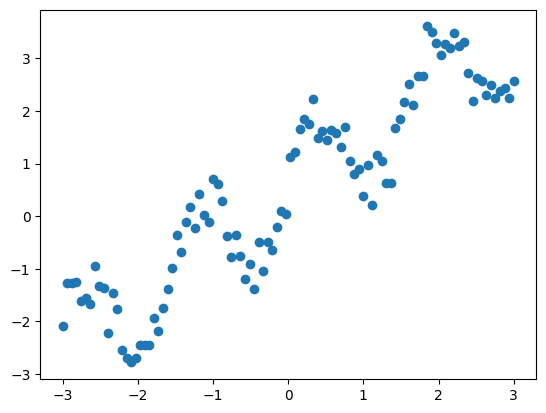

In [15]:
plt.plot(x,y,'o')

In [16]:
X=x[:,np.newaxis]
print(X.shape)

(100, 1)


### Split data to train and test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [18]:
print("shape of X_trai:", X_train.shape)
print("shape of x_test:",X_test.shape)

shape of X_trai: (75, 1)
shape of x_test: (25, 1)


### select estimator and model

In [19]:
from sklearn.linear_model import LinearRegression
Lrg=LinearRegression()

### fit and tarin

In [20]:
Lrg.fit(X_train,y_train)

LinearRegression()

In [21]:
print('Weight coefficients: ', Lrg.coef_)
print('y-axis intercept: ', Lrg.intercept_)

Weight coefficients:  [0.91899309]
y-axis intercept:  0.4668332633888981


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = weight \times x + \text{intercept}.$$

### Prediction

In [22]:
y_predic= Lrg.predict(X_test)

### Accuracy

In [23]:
from sklearn.metrics import mean_squared_error


In [24]:
print("mean squard error:",mean_squared_error(y_test,y_predic))
print("R score:", Lrg.score(X_test,y_test))

mean squard error: 0.7305460427521961
R score: 0.7719017250564159


### Plot

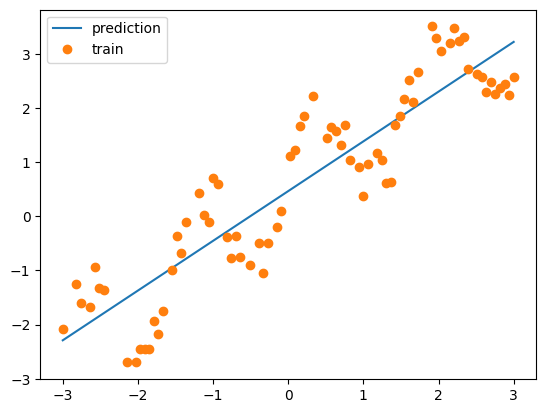

In [25]:
minp=X.min()*Lrg.coef_[0]+Lrg.intercept_
maxp=X.max()*Lrg.coef_[0]+Lrg.intercept_
plt.plot([X.min(),X.max()],[minp,maxp],label='prediction')
plt.plot(X_train, y_train,'o', label='train')
plt.legend()
plt.show()

### Plot test data

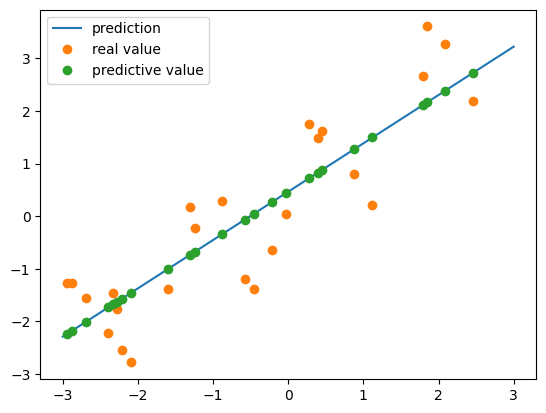

In [26]:
plt.plot([X.min(),X.max()],[minp,maxp],label='prediction')
plt.plot(X_test,y_test,'o',label='real value')
plt.plot(X_test,y_predic,'o',label='predictive value')
plt.legend()
plt.show()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Add a feature containing  `sin(4x)` to `X` and redo the fit. Visualize the predictions with this new richer, yet linear, model.
      </li>
    </ul>
</div>

In [27]:
temp=np.sin(4*X)
XX=np.concatenate((X,temp),axis=1)
XX.shape

(100, 2)

In [28]:
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,y)

In [29]:
Lrg.fit(XX_train,yy_train)

LinearRegression()

In [30]:
yy_predic=Lrg.predict(XX_test)

In [31]:
print("mean squard error:",mean_squared_error(yy_test,yy_predic))
print("R score:", Lrg.score(XX_test,yy_test))

mean squard error: 0.0787445598161297
R score: 0.9744633434985245


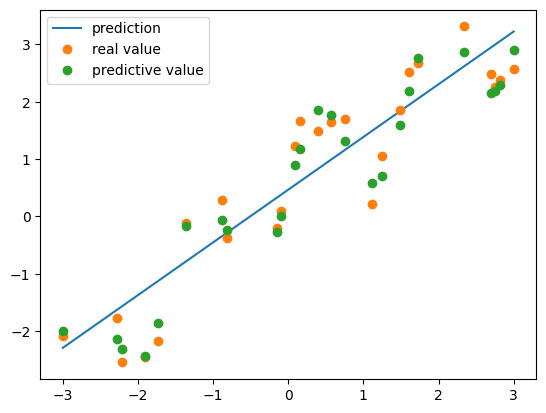

In [32]:
plt.plot([XX.min(),XX.max()],[minp,maxp],label='prediction')
plt.plot(XX_test[:,0],yy_test,'o',label='real value')
plt.plot(XX_test[:,0],yy_predic,'o',label='predictive value')
plt.legend()
plt.show()

# using regularization in linear regressipn

### select model

In [33]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [39]:
##### alpha is Regularization strength
Ridge_LR=Ridge(alpha=0.1)
Lasso_LR=Lasso(alpha=0.1)

In [40]:
#training and fiting
Ridge_LR.fit(XX_train,yy_train)
Lasso_LR.fit(XX_train,yy_train)

Lasso(alpha=0.1)

In [41]:
#prediction
y_predic_ridge=Redge_LR.predict(XX_test)
y_predic_lasso=Lasso_LR.predict(XX_test)

In [44]:
#evaluation
print("score of Ridge estimator",Redge_LR.score(XX_test,yy_test))
print("score of Lasso estimator",Lasso_LR.score(XX_test,yy_test))

score of Ridge estimator 0.9744357121245178
score of Lasso estimator 0.9665937181851805


### increasing of feature by Polynomial Feature Transform

In [77]:
from sklearn.preprocessing import PolynomialFeatures
trans=PolynomialFeatures(degree=2,include_bias=False)
XXX= trans.fit_transform(X)
print(XXX.shape)

(100, 2)


In [78]:
XXX_train,XXX_test,yyy_train,yyy_test=train_test_split(XXX,y)
Lrg.fit(XXX_train,yyy_train)
yyy_predic=Lrg.predict(XXX_test)
print("mean squard error:",mean_squared_error(yyy_test,yyy_predic))
print("R score:", Lrg.score(XXX_test,yyy_test))

mean squard error: 0.5673191075651932
R score: 0.8182868519127928


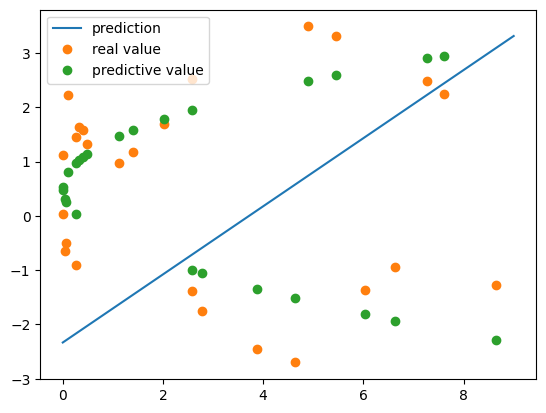

In [79]:
plt.plot([XXX[:,1].min(),XXX[:,1].max()],[minp,maxp],label='prediction')
plt.plot(XXX_test[:,1],yyy_test,'o',label='real value')
plt.plot(XXX_test[:,1],yyy_predic,'o',label='predictive value')
plt.legend()
plt.show()